In [97]:
import os
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import cv2

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
#Structuring dataframe 
df = pd.DataFrame(columns = ['file','label'])

In [11]:
# File path
print(os.listdir())

['.ipynb_checkpoints', 'preprocessing.ipynb', 'data']


In [12]:
file_path = 'data/'

In [13]:
# Regex to extract class info: 
class_info = re.compile(r'(\d+).jpg')

In [14]:
for file in os.listdir('data/'):
    append_dict = {'file':file_path+file, 'label':class_info.findall(file)[0]}
    df = df.append(append_dict, ignore_index = True)

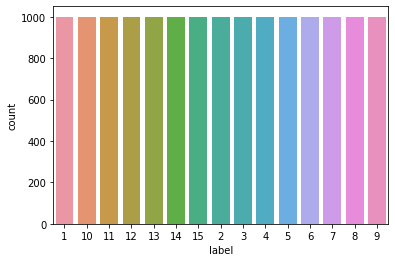

In [15]:
# We can see that we have a balanced dataset. Each of our labels have a thousand images.
sns.countplot(df['label']);

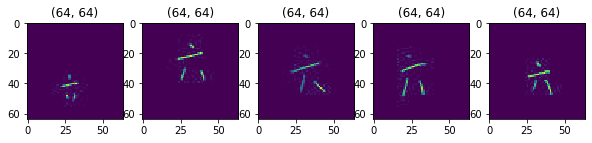

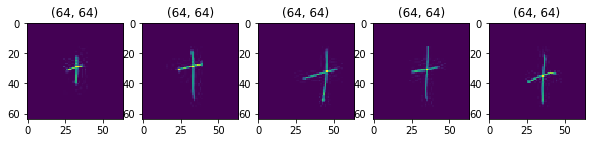

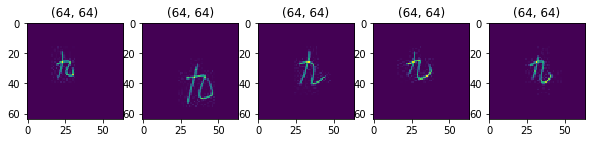

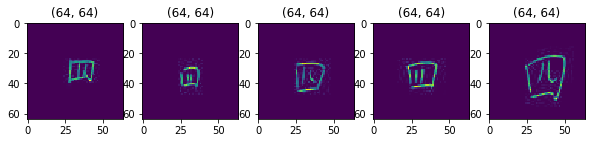

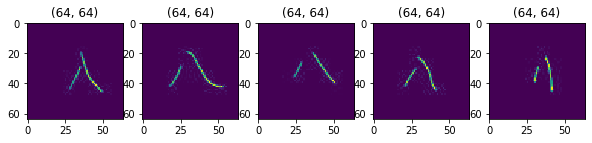

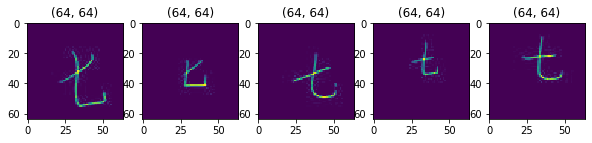

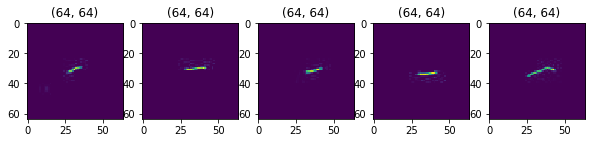

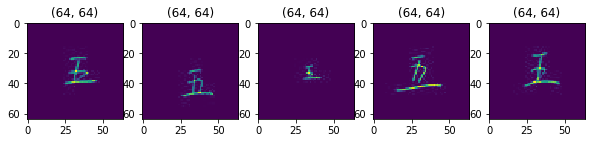

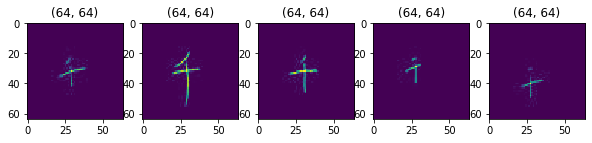

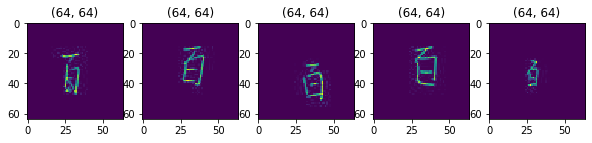

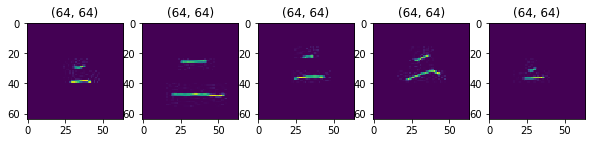

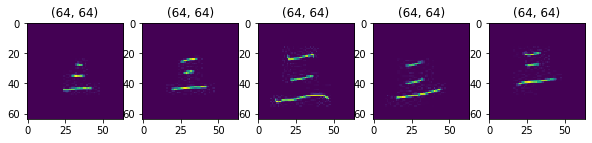

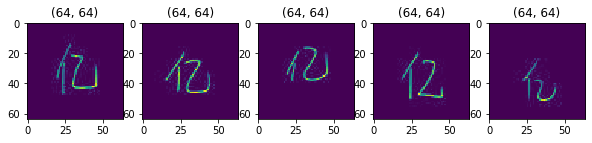

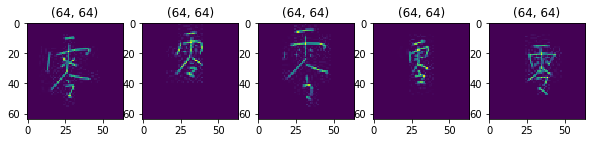

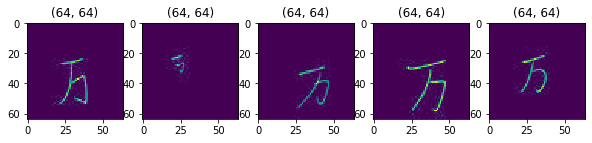

In [83]:
for label in df['label'].unique():
    img_list = df[df['label'] == label]['file'][:5].values
    plt.figure(figsize=(10,10))
    for img in range(len(img_list)):
        plt.subplot(1,5,img+1);
        showing_img = mpimg.imread(img_list[img])
        plt.imshow(showing_img);
        plt.title(showing_img.shape)
    plt.show()

In [87]:
data_gen = ImageDataGenerator(validation_split = 0.2)

In [118]:
training_data = data_gen.flow_from_dataframe(df, x_col = 'file', y_col = 'label', 
                                    target_size = (64,64), color_mode = 'grayscale', subset='training')

Found 12000 validated image filenames belonging to 15 classes.


In [119]:
validation_data = data_gen.flow_from_dataframe(df, x_col = 'file', y_col = 'label', 
                                    target_size = (64,64), color_mode = 'grayscale', subset='validation')

Found 3000 validated image filenames belonging to 15 classes.


In [120]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='glorot_uniform', input_shape=(64, 64, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
    model.add(Dense(15, activation='softmax'))
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(model.summary())
    return model

In [121]:
model = define_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               3075300   
_________________________________________________________________
dense_7 (Dense)              (None, 15)                1515      
Total params: 3,077,135
Trainable params: 3,077,135
Non-trainable params: 0
_________________________________________________________________
None


In [122]:
history = model.fit(data, epochs = 10, validation_data = validation_data)

Train for 469 steps, validate for 94 steps
Epoch 1/10
469/469 [==============================] - 31s 67ms/step - loss: 1.9901 - accuracy: 0.4676 - val_loss: 0.6425 - val_accuracy: 0.7853
Epoch 2/10
469/469 [==============================] - 32s 68ms/step - loss: 0.4823 - accuracy: 0.8409 - val_loss: 0.2225 - val_accuracy: 0.9317
Epoch 3/10
469/469 [==============================] - 33s 71ms/step - loss: 0.2063 - accuracy: 0.9328 - val_loss: 0.1228 - val_accuracy: 0.9647
Epoch 4/10
469/469 [==============================] - 35s 74ms/step - loss: 0.1237 - accuracy: 0.9599 - val_loss: 0.0706 - val_accuracy: 0.9790
Epoch 5/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0632 - accuracy: 0.9800 - val_loss: 0.0430 - val_accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0586 - accuracy: 0.9801 - val_loss: 0.0516 - val_accuracy: 0.9813
Epoch 7/10
469/469 [==============================] - 31s 67ms/step - loss: 0.0635 - accuracy

In [123]:
hist_dict = history.history

In [124]:
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [126]:
loss = hist_dict['loss']
acc = hist_dict['accuracy']
val_loss = hist_dict['val_loss']
val_acc = hist_dict['val_accuracy']

In [127]:
epochs = range(1,len(acc) + 1)

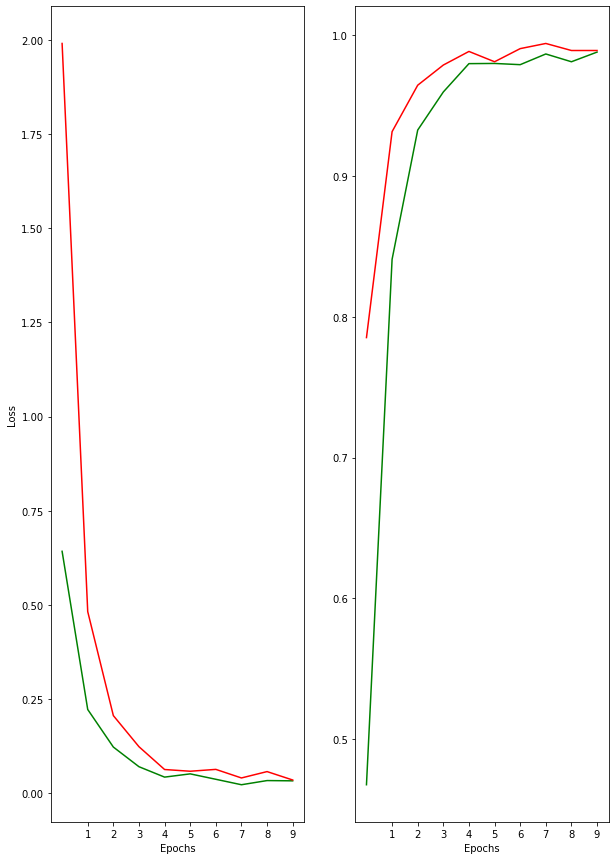

In [146]:
plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.plot(acc)
plt.plot(val_loss, color = 'green')
plt.plot(loss, color = 'red')
plt.subplot(1,2,2)
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.plot(acc, color = 'green')
plt.plot(val_acc, color = 'red')
plt.show()